In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Base_de_datos_peliculas.csv')
df.head()

,id,titulo,anio,mes,genero,clasificacion_edad,estudio,imdb_pelicula,actor_principal,actor_rating,actor_nominado,actor_ganador,director,director_rating,director_nominado,director_ganador
0,2,Ariel,1988,10,"Comedia, Drama, Romance, Crimen",PG,Villealfa Filmproductions,7.100,Turo Pajala,6.6,1,0,Aki Kaurismäki,7.6,1,0
1,3,Sombras en el paraíso,1986,10,"Comedia, Drama, Romance",PG,Villealfa Filmproductions,7.291,Matti Pellonpää,6.8,1,0,Aki Kaurismäki,7.8,1,0
2,5,Four Rooms,1995,12,Comedia,PG,Miramax,5.865,Tim Roth,5.4,0,0,Allison Anders,6.4,0,0
3,6,Los jueces de la noche,1993,10,"Acción, Crimen, Suspense",PG,Largo Entertainment,6.500,Emilio Estevez,6.0,0,0,Stephen Hopkins,7.0,1,0
4,8,Life in Loops (A Megacities RMX),2006,1,Documental,PG,inLoops,7.150,NaN,6.7,1,0,Timo Novotny,7.7,1,0


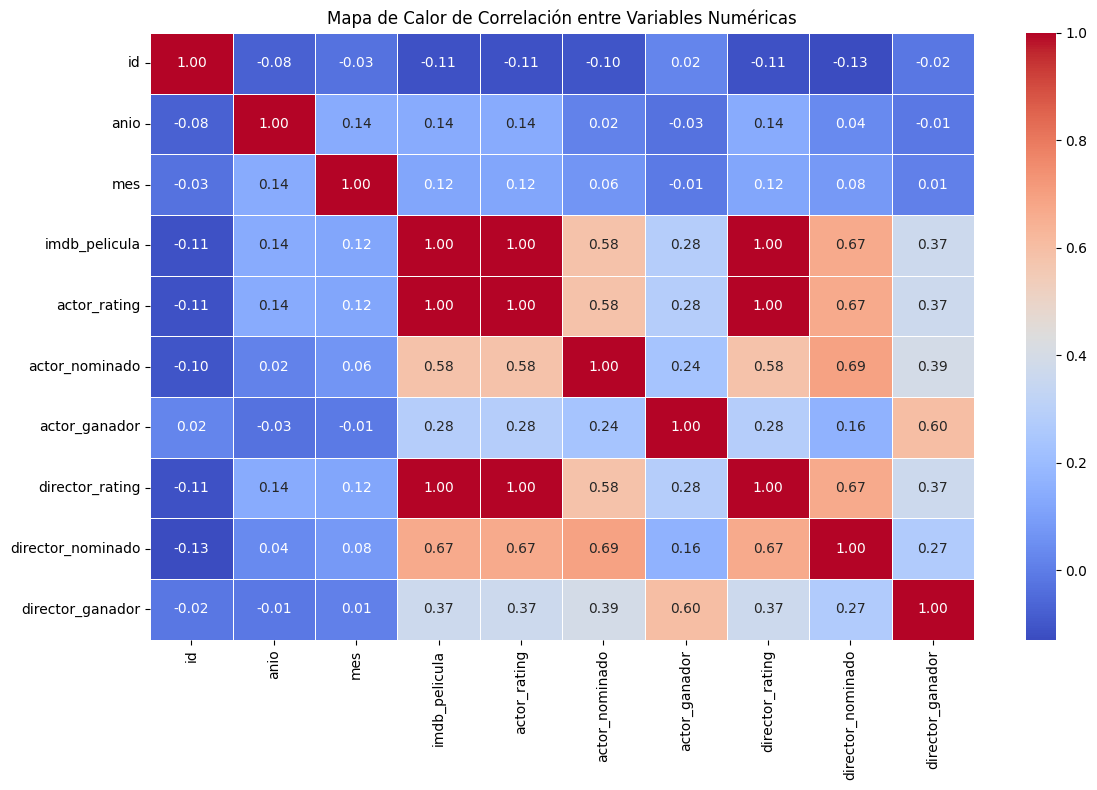

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo variables numéricas (opcionalmente excluir variables dummies si se desea)
df_corr = df.select_dtypes(include=['int64', 'float64'])

# O bien, si quieres solo las principales variables sin dummies:
# columnas_base = ['actor_rating', 'actor_nominado', 'actor_ganador', 'director_rating',
#                  'director_nominado', 'director_ganador', 'anio', 'mes', 'edad_adulto',
#                  'imdb_pelicula']
# df_corr = df[ columnas_base ]

# Calcular matriz de correlación
correlation_matrix = df_corr.corr()

# Plot del heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()


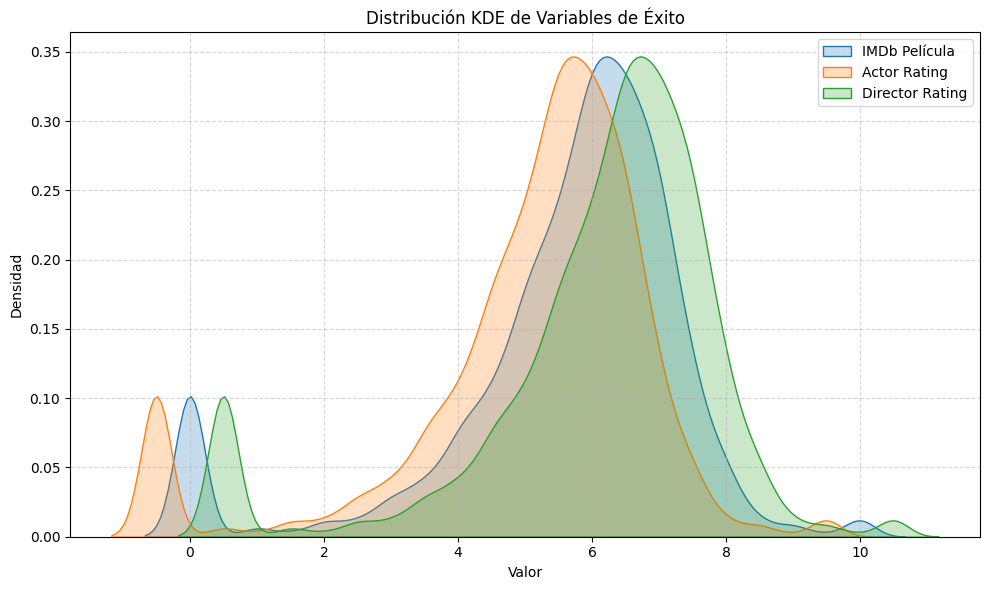

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE de variables relevantes
plt.figure(figsize=(10, 6))

# Añade aquí las variables numéricas que desees comparar
sns.kdeplot(df['imdb_pelicula'], label='IMDb Película', fill=True)
sns.kdeplot(df['actor_rating'], label='Actor Rating', fill=True)
sns.kdeplot(df['director_rating'], label='Director Rating', fill=True)

plt.title('Distribución KDE de Variables de Éxito')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  40000 non-null  int64  
 1   titulo              40000 non-null  object 
 2   anio                40000 non-null  int64  
 3   mes                 40000 non-null  int64  
 4   genero              38177 non-null  object 
 5   clasificacion_edad  40000 non-null  object 
 6   estudio             32448 non-null  object 
 7   imdb_pelicula       40000 non-null  float64
 8   actor_principal     38148 non-null  object 
 9   actor_rating        40000 non-null  float64
 10  actor_nominado      40000 non-null  int64  
 11  actor_ganador       40000 non-null  int64  
 12  director            37488 non-null  object 
 13  director_rating     40000 non-null  float64
 14  director_nominado   40000 non-null  int64  
 15  director_ganador    40000 non-null  int64  
dtypes: f

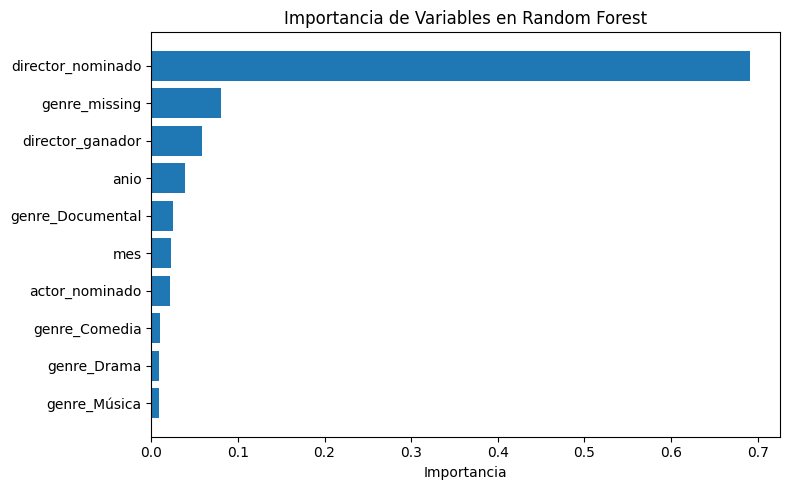

/tmp/ipython-input-5-3584071765.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette=colors)


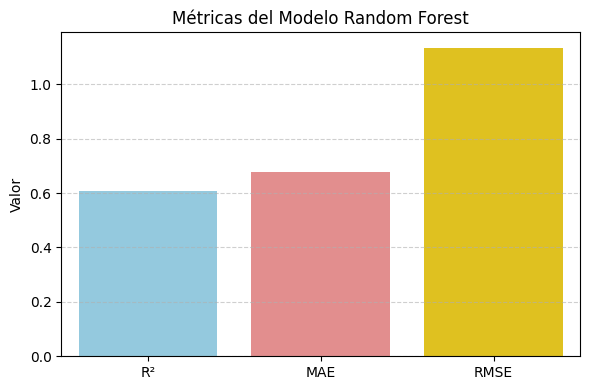

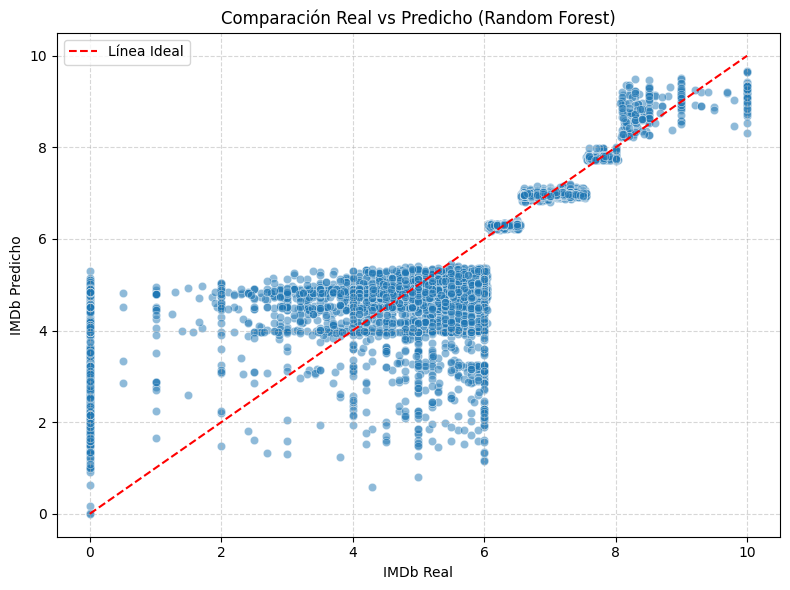

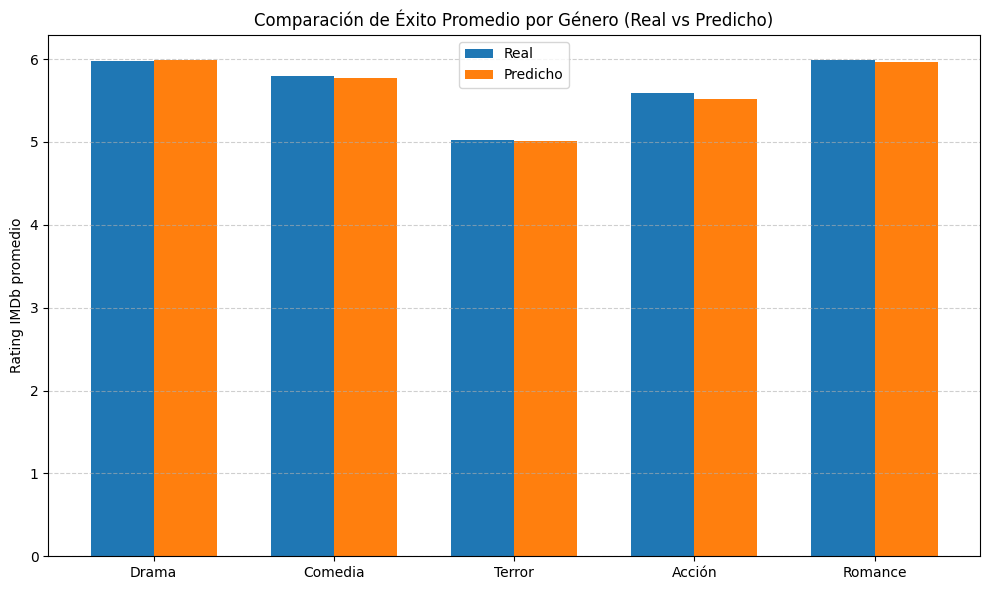

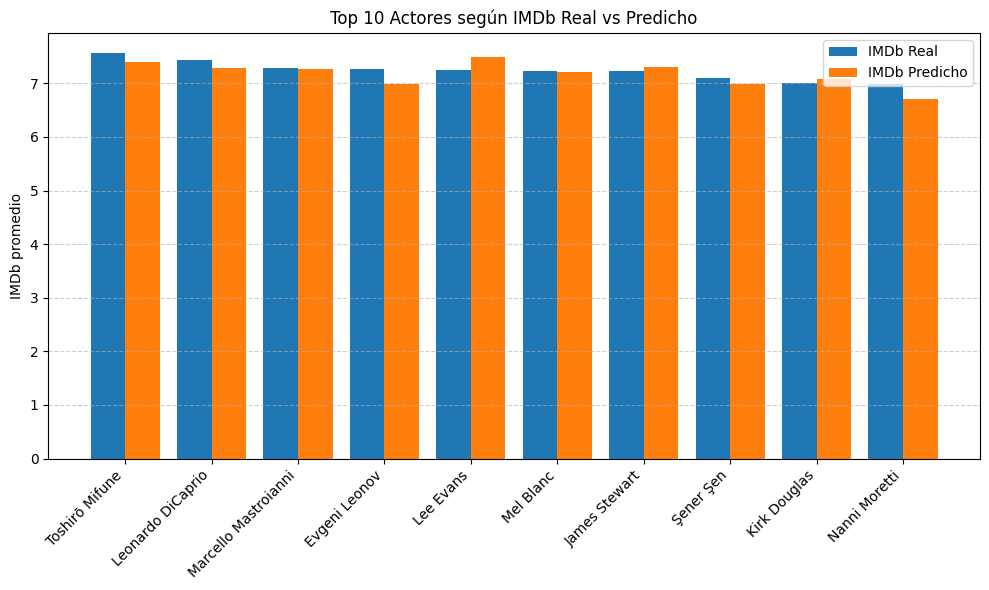

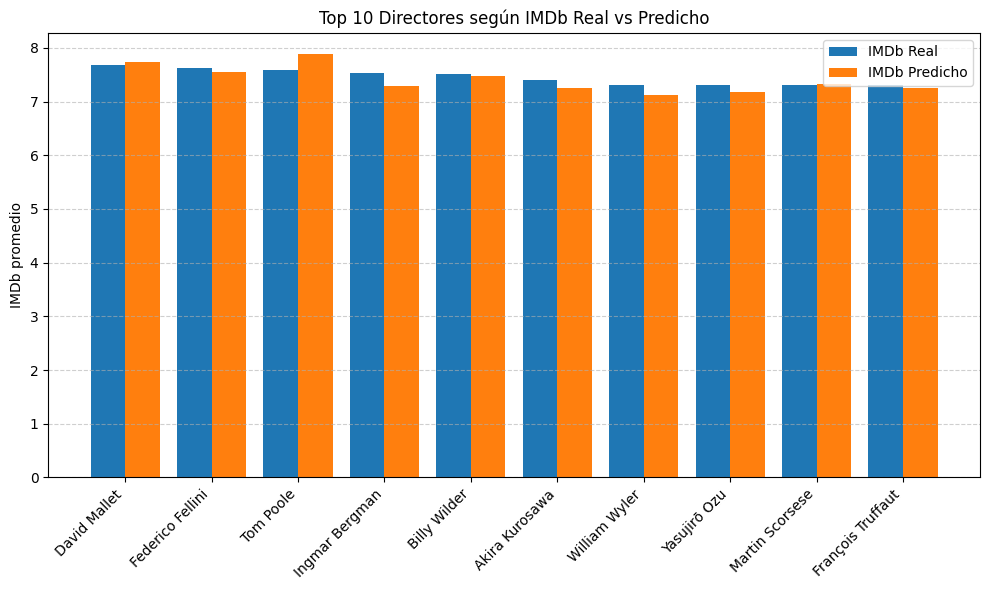

In [ ]:
# Volver a importar y ejecutar todo tras reinicio del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Cargar dataset
csv_path = '/content/Base_de_datos_peliculas.csv'
df = pd.read_csv(csv_path)

# Filtrar entradas sin año
df = df[df['anio'] != 0].copy()

# Clasificación de edad a binaria
df['edad_adulto'] = (df['clasificacion_edad'] == '18+').astype(int)

# Codificar géneros (multi-etiqueta)
genre_lists = df['genero'].fillna('').apply(lambda x: [g.strip() for g in x.split(',') if g.strip() != ''])
mlb = MultiLabelBinarizer()
genre_dummies = mlb.fit_transform(genre_lists)
genre_cols = [f"genre_{g}" for g in mlb.classes_]
genre_df = pd.DataFrame(genre_dummies, columns=genre_cols, index=df.index)
df = pd.concat([df, genre_df], axis=1)
df['genre_missing'] = df['genero'].isna().astype(int)

# Definir variables predictoras y objetivo
features_to_drop = [
    'id', 'titulo', 'genero', 'clasificacion_edad', 'estudio',
    'actor_principal', 'director', 'actor_rating', 'director_rating', 'imdb_pelicula'
]
X = df.drop(columns=features_to_drop)
y = df['imdb_pelicula']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [7, 10, 15],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Predicción
y_pred = best_rf.predict(X_test)

# Importancia de variables
importances = best_rf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8, 5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Importancia')
plt.title('Importancia de Variables en Random Forest')
plt.tight_layout()
plt.show()

# Calcular métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Gráfico de métricas
plt.figure(figsize=(6, 4))
metrics = ['R²', 'MAE', 'RMSE']
values = [r2, mae, rmse]
colors = ['skyblue', 'lightcoral', 'gold']

sns.barplot(x=metrics, y=values, palette=colors)
plt.title('Métricas del Modelo Random Forest')
plt.ylabel('Valor')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Gráfico Real vs Predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Línea Ideal')
plt.xlabel('IMDb Real')
plt.ylabel('IMDb Predicho')
plt.title('Comparación Real vs Predicho (Random Forest)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# Crear dataframe temporal con valores reales y predichos
df_plot = X_test.copy()
df_plot['real'] = y_test
df_plot['pred'] = y_pred

# Lista de géneros principales para comparar
generos_comparar = ['genre_Drama', 'genre_Comedia', 'genre_Terror', 'genre_Acción', 'genre_Romance']

# Calcular promedios por género
data_generos = []
for genero in generos_comparar:
    if genero in df_plot.columns:
        mask = df_plot[genero] == 1
        data_generos.append({
            'Género': genero.replace('genre_', ''),
            'IMDb Real Promedio': df_plot.loc[mask, 'real'].mean(),
            'IMDb Predicho Promedio': df_plot.loc[mask, 'pred'].mean()
        })

# Convertir a DataFrame para graficar
df_genero_avg = pd.DataFrame(data_generos)

# Gráfico comparativo
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(df_genero_avg))

plt.bar(x - bar_width/2, df_genero_avg['IMDb Real Promedio'], width=bar_width, label='Real')
plt.bar(x + bar_width/2, df_genero_avg['IMDb Predicho Promedio'], width=bar_width, label='Predicho')

plt.xticks(x, df_genero_avg['Género'])
plt.ylabel('Rating IMDb promedio')
plt.title('Comparación de Éxito Promedio por Género (Real vs Predicho)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# Recuperar actor_principal desde el DataFrame original
df_actor_comp = df.loc[X_test.index, ['actor_principal']].copy()
df_actor_comp['real'] = y_test
df_actor_comp['pred'] = y_pred

# Agrupar por actor y calcular promedio de IMDb real y predicho
df_actor_avg = df_actor_comp.groupby('actor_principal').agg({
    'real': 'mean',
    'pred': 'mean',
    'actor_principal': 'count'  # cantidad de películas por actor
}).rename(columns={'actor_principal': 'num_peliculas'}).reset_index()

# Filtrar para actores con suficientes películas (por ejemplo, al menos 5)
df_actor_avg = df_actor_avg[df_actor_avg['num_peliculas'] >= 5]

# Ordenar por IMDb real promedio y tomar los top 10
top_actors = df_actor_avg.sort_values(by='real', ascending=False).head(10)

# Gráfico de comparación real vs predicho por actor
plt.figure(figsize=(10, 6))
bar_width = 0.4
x = np.arange(len(top_actors))

plt.bar(x - bar_width/2, top_actors['real'], width=bar_width, label='IMDb Real')
plt.bar(x + bar_width/2, top_actors['pred'], width=bar_width, label='IMDb Predicho')

plt.xticks(x, top_actors['actor_principal'], rotation=45, ha='right')
plt.ylabel('IMDb promedio')
plt.title('Top 10 Actores según IMDb Real vs Predicho')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
# Recuperar el nombre del director desde el DataFrame original para el conjunto de prueba
df_director_comp = df.loc[X_test.index, ['director']].copy()
df_director_comp['real'] = y_test
df_director_comp['pred'] = y_pred

# Agrupar por director y calcular promedios
df_director_avg = df_director_comp.groupby('director').agg({
    'real': 'mean',
    'pred': 'mean',
    'director': 'count'
}).rename(columns={'director': 'num_peliculas'}).reset_index()

# Filtrar a directores con al menos 5 películas para que los promedios sean fiables
df_director_avg = df_director_avg[df_director_avg['num_peliculas'] >= 5]

# Tomar los 10 mejores según IMDb real
top_directors = df_director_avg.sort_values(by='real', ascending=False).head(10)

# Gráfico de comparación
plt.figure(figsize=(10, 6))
bar_width = 0.4
x = np.arange(len(top_directors))

plt.bar(x - bar_width/2, top_directors['real'], width=bar_width, label='IMDb Real')
plt.bar(x + bar_width/2, top_directors['pred'], width=bar_width, label='IMDb Predicho')

plt.xticks(x, top_directors['director'], rotation=45, ha='right')
plt.ylabel('IMDb promedio')
plt.title('Top 10 Directores según IMDb Real vs Predicho')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

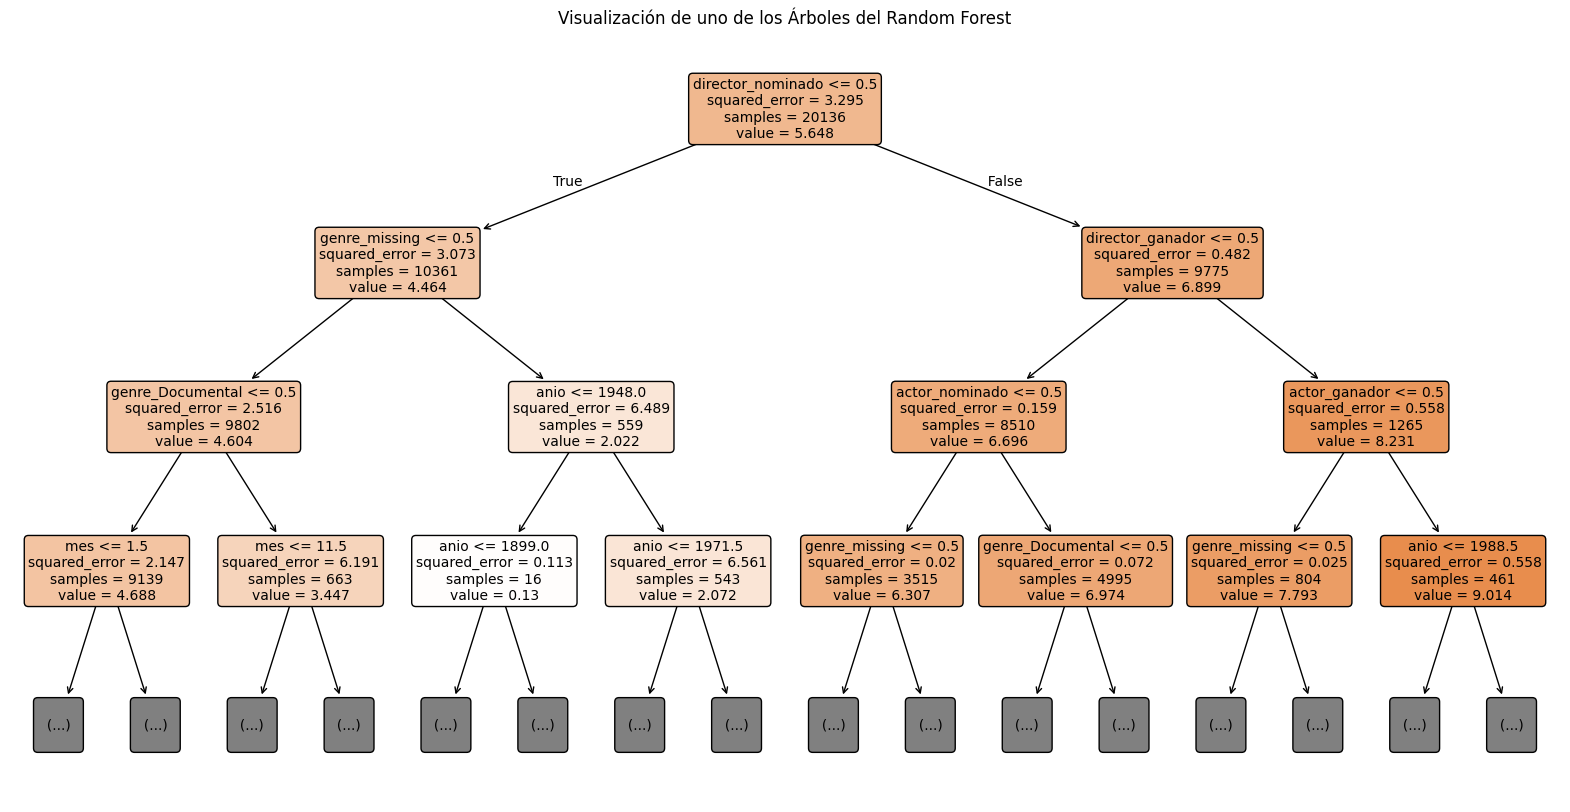

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Seleccionamos el primer árbol del bosque
arbol_individual = best_rf.estimators_[0]

# Graficar el árbol con nombres de características y límites de profundidad
plt.figure(figsize=(20, 10))  # Puedes ajustar tamaño según sea necesario
plot_tree(
    arbol_individual,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=3,  # Profundidad visual máxima para que no sea muy extenso
    fontsize=10
)
plt.title("Visualización de uno de los Árboles del Random Forest")
plt.show()

/tmp/ipython-input-7-3274761068.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genero'].fillna('Unknown', inplace=True)


R2 y MAE en datos de prueba por modelo:
                  R2_test  MAE_test
Regresión Lineal    0.714     0.483
Ridge               0.714     0.483
Lasso               0.692     0.481
SVR                 0.686     0.477
Red Neuronal        0.664     0.534
Árbol Decisión      0.720     0.465
Random Forest       0.724     0.462


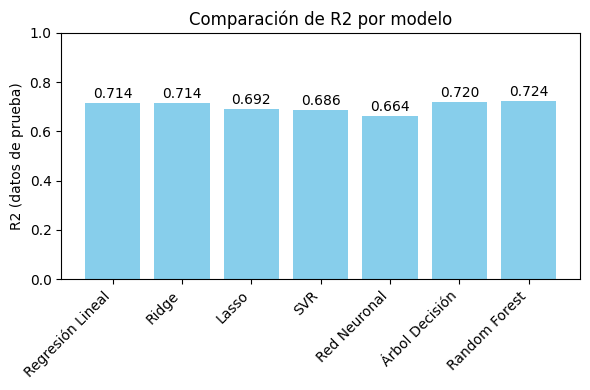

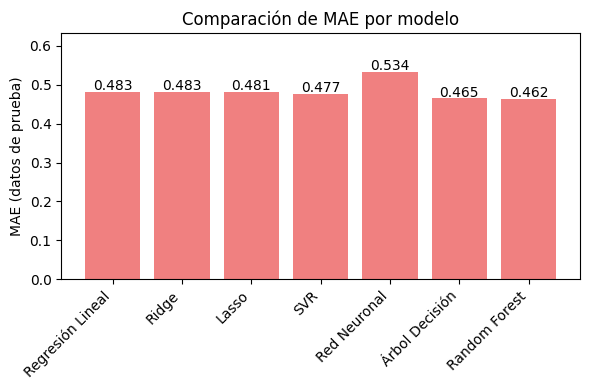

In [ ]:
import pandas as pd
import numpy as np

# 1. Cargar datos
df = pd.read_csv('/content/Base_de_datos_peliculas.csv')  # Asegurarse de que el archivo CSV esté en el directorio de trabajo

# 2. Limpieza de datos
# Eliminar películas con rating 0 (datos atípicos o sin información suficiente)
df = df[df['imdb_pelicula'] > 0].copy()

# Eliminar columnas no útiles para la predicción o que inducen fugas de información
cols_to_drop = ['id', 'titulo', 'actor_principal', 'director', 'estudio',
                'actor_rating', 'director_rating']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 3. Preprocesamiento de variables categóricas
# Rellenar faltantes en 'genero' con 'Unknown' para indicar género desconocido
df['genero'].fillna('Unknown', inplace=True)

# Convertir la lista de géneros en columnas dummy (uno-hot encoding)
# Separar por coma y quitar espacios
df['genero'] = df['genero'].apply(lambda g: ','.join([genre.strip() for genre in g.split(',') if genre.strip() != '']))
genero_dummies = df['genero'].str.get_dummies(sep=',')

# Codificar 'clasificacion_edad' a binario: 1 si es "18+" (adulto), 0 si es "PG"
df['adulto'] = (df['clasificacion_edad'] == '18+').astype(int)
df.drop(columns=['clasificacion_edad', 'genero'], inplace=True)  # ya no se necesita las columnas originales

# Codificar el mes de estreno como dummies (12 meses + posiblemente 0 si hay desconocido)
mes_dummies = pd.get_dummies(df['mes'], prefix='mes')
df.drop(columns=['mes'], inplace=True)

# Unir todas las características finales
features = pd.concat([df.drop(columns=['imdb_pelicula']), genero_dummies, mes_dummies], axis=1)
target = df['imdb_pelicula']

# 4. Usar un subconjunto de datos para entrenar más rápido (por ejemplo, 10000 filas aleatorias)
muestra = 10000
data_sample = features.join(target).sample(n=muestra, random_state=42)
X = data_sample.drop(columns=['imdb_pelicula'])
y = data_sample['imdb_pelicula']

# Dividir en conjunto de entrenamiento y prueba (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Escalado de características (Standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Definir y entrenar los modelos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

modelos = {
    "Regresión Lineal": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(alpha=0.1, random_state=42, max_iter=10000),  # alpha reducido para no subajustar
    "SVR": SVR(kernel='rbf'),  # SVR con kernel RBF (parámetros por defecto)
    "Red Neuronal": MLPRegressor(random_state=42, max_iter=300),
    "Árbol Decisión": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(max_depth=5, n_estimators=100, random_state=42, n_jobs=-1)
}

resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    # Predicción en conjunto de prueba
    y_pred = modelo.predict(X_test_scaled)
    # Predicción en entrenamiento (para diagnosticar sobreajuste)
    y_pred_train = modelo.predict(X_train_scaled)
    # Calcular métricas R^2 y MAE
    from sklearn.metrics import r2_score, mean_absolute_error
    r2_test = r2_score(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    resultados[nombre] = {
        "R2_train": r2_train, "R2_test": r2_test,
        "MAE_train": mae_train, "MAE_test": mae_test
    }

# Convertir resultados a DataFrame para visualizar fácilmente
resultados_df = pd.DataFrame(resultados).T
print("R2 y MAE en datos de prueba por modelo:")
print(resultados_df[['R2_test', 'MAE_test']].round(3))

# 7. Graficar comparativas de R2 y MAE para cada modelo
import matplotlib.pyplot as plt

modelos_orden = list(resultados.keys())  # nombres en orden definido

# Gráfico de barras para R2
plt.figure(figsize=(6,4))
r2_vals = resultados_df['R2_test'][modelos_orden]
plt.bar(modelos_orden, r2_vals, color='skyblue')
plt.title("Comparación de R2 por modelo")
plt.ylabel("R2 (datos de prueba)")
plt.ylim(0, 1)
# Mostrar el valor exacto encima de cada barra
for i, v in enumerate(r2_vals):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de barras para MAE
plt.figure(figsize=(6,4))
mae_vals = resultados_df['MAE_test'][modelos_orden]
plt.bar(modelos_orden, mae_vals, color='lightcoral')
plt.title("Comparación de MAE por modelo")
plt.ylabel("MAE (datos de prueba)")
plt.ylim(0, mae_vals.max() + 0.1)
for i, v in enumerate(mae_vals):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()